In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(XT,YT),(Xt,Yt) = imdb.load_data(num_words=12000)

In [29]:
print(XT.shape,YT.shape)
print(Xt.shape,Yt.shape)

(25000,) (25000,)
(25000,) (25000,)


In [10]:
word_idx = imdb.get_word_index()

In [22]:
idx_word= dict((value,key) for (key,value) in word_idx.items())
idx_word[1]

'the'

In [26]:
def printReview(review):
    print(' '.join(idx_word.get(idx-3,'?') for idx in review))
printReview(XT[0])    

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done

In [27]:
from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [32]:
X_train =  sequence.pad_sequences(XT,maxlen=500)
X_test =  sequence.pad_sequences(Xt,maxlen=500)

In [33]:
print(X_train.shape,X_test.shape)

(25000, 500) (25000, 500)


In [34]:
print(X_train[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [69]:
model = Sequential()
model.add(Embedding(12000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 64)          768000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 771,137
Trainable params: 771,137
Non-trainable params: 0
_________________________________________________________________


In [70]:
checkpoint=ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    period=1,
)
earlyStop=EarlyStopping(
    monitor='val_loss',patience=2
)

model.fit(X_train,YT,epochs=10,batch_size=128,validation_split=0.2,callbacks=[checkpoint,earlyStop])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 920us/step - loss: 0.5866 - acc: 0.6769 - val_loss: 0.4644 - val_acc: 0.7948
Epoch 2/10
20000/20000 [==============================] - 18s 905us/step - loss: 0.3725 - acc: 0.8421 - val_loss: 0.3737 - val_acc: 0.8410
Epoch 3/10
20000/20000 [==============================] - 18s 920us/step - loss: 0.2186 - acc: 0.9173 - val_loss: 0.3647 - val_acc: 0.8520
Epoch 4/10
20000/20000 [==============================] - 19s 959us/step - loss: 0.1246 - acc: 0.9582 - val_loss: 0.4699 - val_acc: 0.8098
Epoch 5/10
20000/20000 [==============================] - 18s 924us/step - loss: 0.0585 - acc: 0.9844 - val_loss: 0.4640 - val_acc: 0.8400


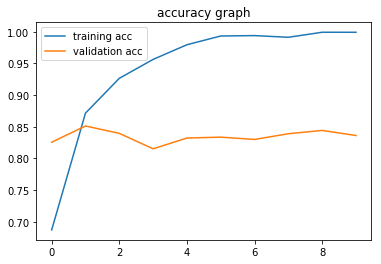

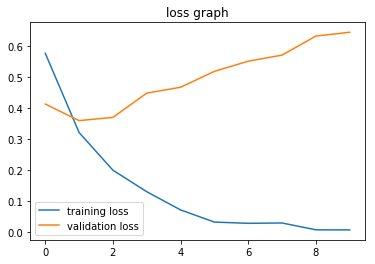

In [73]:
import matplotlib.pyplot as plt
plt.title('accuracy graph')
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='validation acc')
plt.legend()
plt.show()

plt.title('loss graph')
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

In [51]:
# model.save("best_model.h5")
# model.load_weights('best_model.h5')
# model.evaluate(X_test,Yt)

In [74]:
model.load_weights('best_model.h5')

In [75]:
model.evaluate(X_test,Yt)

25000/25000 [==============================] - 17s 672us/step


[0.37515069390296935, 0.847599983215332]